# <font color=blue> **Challenge Telecom X: análisis de evasión de clientes - telecom X (Parte 2)**



#**<font color=Green> Introducción**

Este proyecto forma parte del desafío Telecom X y se enfoca en el análisis y la predicción de la evasión (churn) de clientes. La Parte 2 se centra en la preparación avanzada de datos, el análisis de correlación y la construcción de modelos predictivos para identificar a los clientes en riesgo de cancelar su servicio.

# <font color=blue> **I.PREPARACIÓN DE DATOS**

## <font color=green> **1.Extracción de Datos**

Carga el archivo CSV que contiene los datos tratados anteriormente.

**Atención:** Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [3]:
import pandas as pd
normalizado = pd.read_csv('/content/TelecomX_normalizado.csv')  # archivo anterior
normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
normalizado.info()  # Muestra info 21 columnas y 7267 filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## <font color=green> **2.Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el **`costumerID`**).Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [5]:
normalizado = normalizado.drop('customerID', axis=1) # Eliminación columna customerID
normalizado.info() # muestra la info 20 columnas y 7267 filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7267 non-null   object 
 2   customer.SeniorCitizen     7267 non-null   int64  
 3   customer.Partner           7267 non-null   object 
 4   customer.Dependents        7267 non-null   object 
 5   customer.tenure            7267 non-null   int64  
 6   phone.PhoneService         7267 non-null   object 
 7   phone.MultipleLines        7267 non-null   object 
 8   internet.InternetService   7267 non-null   object 
 9   internet.OnlineSecurity    7267 non-null   object 
 10  internet.OnlineBackup      7267 non-null   object 
 11  internet.DeviceProtection  7267 non-null   object 
 12  internet.TechSupport       7267 non-null   object 
 13  internet.StreamingTV       7267 non-null   objec

## <font color=green> **3.Encording**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.



In [6]:
import pandas as pd

# 1. Manejar valores nulos en 'Churn'
# Opción: rellenar con el valor más frecuente (modo) o eliminar filas
normalizado['Churn'].fillna(normalizado['Churn'].mode()[0], inplace=True)

# 2. Convertir 'account.Charges.Total' a numérico
# Reemplazar valores no numéricos (si los hay) y convertir a float
normalizado['account.Charges.Total'] = pd.to_numeric(normalizado['account.Charges.Total'], errors='coerce')
# Si hay valores nulos después de la conversión, rellenarlos (por ejemplo, con la mediana)
normalizado['account.Charges.Total'].fillna(normalizado['account.Charges.Total'].median(), inplace=True)

# 3. Identificar columnas categóricas (excluyendo 'Churn' es la variable objetivo)
categorical_columns = [
    'customer.gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]
# 4. Aplicar one-hot encoding a las columnas categóricas
normalizado = pd.get_dummies(normalizado, columns=categorical_columns, drop_first=True)

# 5. Codificar 'Churn' con label encoding (si es la variable objetivo)
# Suponiendo que 'Churn' tiene valores como 'Yes'/'No'
normalizado['Churn'] = normalizado['Churn'].map({'Yes': 1, 'No': 0})

# Verificar las columnas del nuevo DataFrame
print(normalizado.dtypes)

Churn                                              int64
customer.SeniorCitizen                             int64
customer.tenure                                    int64
account.Charges.Monthly                          float64
account.Charges.Total                            float64
customer.gender_Male                                bool
customer.Partner_Yes                                bool
customer.Dependents_Yes                             bool
phone.PhoneService_Yes                              bool
phone.MultipleLines_No phone service                bool
phone.MultipleLines_Yes                             bool
internet.InternetService_Fiber optic                bool
internet.InternetService_No                         bool
internet.OnlineSecurity_No internet service         bool
internet.OnlineSecurity_Yes                         bool
internet.OnlineBackup_No internet service           bool
internet.OnlineBackup_Yes                           bool
internet.DeviceProtection_No in

/tmp/ipython-input-452876233.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  normalizado['Churn'].fillna(normalizado['Churn'].mode()[0], inplace=True)
/tmp/ipython-input-452876233.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [21]:
normalizado.head()

,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,-0.950200,0.029206,-0.743701,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,0,-0.950200,-0.159990,-0.766154,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,1,0,-1.153700,0.304702,-0.881525,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,-0.787401,1.104635,-0.459386,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,1,-1.194400,0.636624,-0.887458,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


## <font color=green> **4.Verificación de la Proporción de Cancelación (Churn)**


Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.



In [7]:
import pandas as pd
from termcolor import colored

# Calcular la proporción de clientes que cancelaron (Churn = 1) y los que permanecieron (Churn = 0)
proporcion_churn = normalizado['Churn'].value_counts(normalize=True) * 100

# Mostrar los resultados
print("---------Proporción de Churn:-----------------------")
print(proporcion_churn)

# Calcular el conteo absoluto para contexto
conteo_churn = normalizado['Churn'].value_counts()
print("\n--------Conteo absoluto de Churn:-------------------")
print(conteo_churn)

# Evaluar desbalance
if proporcion_churn[1] < 40 or proporcion_churn[1] > 60:
    print("\nADVERTENCIA: Existe un desbalance significativo entre las clases.")
else:
    print("\nLas clases están relativamente balanceadas.")


---------Proporción de Churn:-----------------------
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64

--------Conteo absoluto de Churn:-------------------
Churn
0    5398
1    1869
Name: count, dtype: int64

ADVERTENCIA: Existe un desbalance significativo entre las clases.


**Interpretación:**

* El 74.28% de los clientes permanecieron activos (Churn = 0), mientras que el 25.71% cancelaron (Churn = 1).
* Hay un desbalance, ya que la clase minoritaria (Churn = 1) es mucho menos frecuente. Esto puede requerir técnicas como sobremuestreo (SMOTE), submuestreo, o el uso de métricas como F1-score en lugar de precisión para evaluar modelos predictivos.



##**<font color=green>6.Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.



**Código para Estandarización**

In [8]:
from sklearn.preprocessing import StandardScaler

# Identificar las columnas numéricas que necesitan estandarización
numeric_columns = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Inicializar el escalador
scaler = StandardScaler()

# Aplicar estandarización solo a las columnas numéricas
normalizado[numeric_columns] = scaler.fit_transform(normalizado[numeric_columns])

# Verificar los primeros registros para confirmar
print("Primeras 5 filas después de la estandarización:")
print(normalizado[numeric_columns].head())

# Verificar estadísticas para confirmar (media ~ 0, desviación estándar ~ 1)
print("\nEstadísticas después de la estandarización:")
print(normalizado[numeric_columns].describe())

Primeras 5 filas después de la estandarización:
   customer.tenure  account.Charges.Monthly  account.Charges.Total
0        -0.950200                 0.029206              -0.743701
1        -0.950200                -0.159990              -0.766154
2        -1.153700                 0.304702              -0.881525
3        -0.787401                 1.104635              -0.459386
4        -1.194400                 0.636624              -0.887458

Estadísticas después de la estandarización:
       customer.tenure  account.Charges.Monthly  account.Charges.Total
count     7.267000e+03             7.267000e+03           7.267000e+03
mean     -3.911065e-17             7.333247e-17           3.715512e-17
std       1.000069e+00             1.000069e+00           1.000069e+00
min      -1.316499e+00            -1.542448e+00          -9.971172e-01
25%      -9.502002e-01            -9.723707e-01          -8.283496e-01
50%      -1.362021e-01             1.852096e-01          -3.918300e-01
75%     

**<font color=Green>Inspeccionar los atípicos con un boxplot**

Valores atípicos: El máximo de account.Charges.Total (2.83 en estandarización) sugiere valores atípicos. Si usas modelos sensibles a estos (como SVM o KNN), podrías considerar:



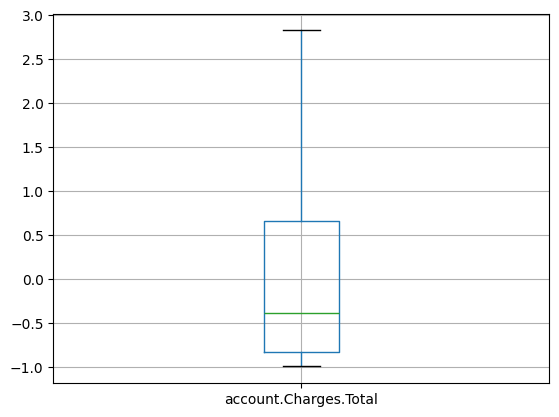

In [9]:
import matplotlib.pyplot as plt
normalizado[['account.Charges.Total']].boxplot()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características (X) y variable objetivo (y)
X = normalizado.drop('Churn', axis=1)
y = normalizado['Churn']

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identificar columnas numéricas para estandarización
numeric_columns = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Inicializar y aplicar estandarización
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Verificar formas de los conjuntos
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

Forma de X_train: (5813, 30)
Forma de X_test: (1454, 30)


# <font color=blue> **II.CORRELACIÓN Y SELECCIÓN DE VARIABLES**

##<font color=Green>**1.  Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial **atención a las variables que muestran una mayor correlación con la cancelación**, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

**Código para el Análisis de Correlación**

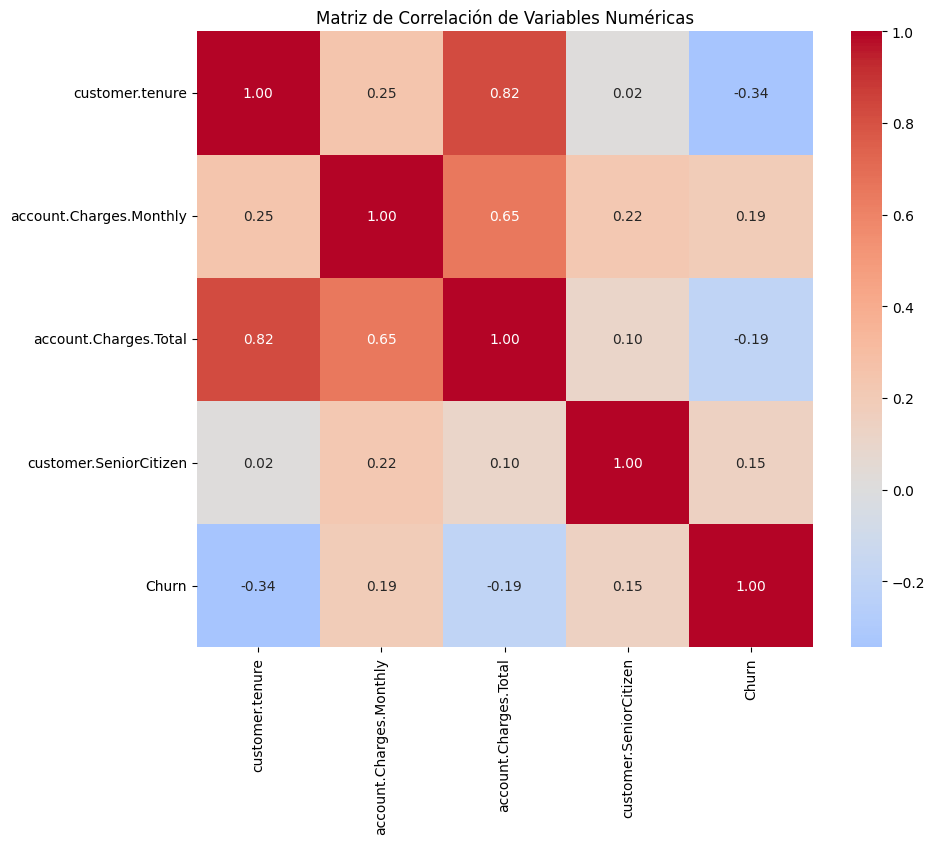

Correlaciones con Churn:
Churn                      1.000000
account.Charges.Monthly    0.189866
customer.SeniorCitizen     0.146733
account.Charges.Total     -0.194016
customer.tenure           -0.344079
Name: Churn, dtype: float64


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas (incluyendo Churn)
numeric_columns = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'customer.SeniorCitizen',
    'Churn'
]

# Calcular la matriz de correlación
correlation_matrix = normalizado[numeric_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Mostrar correlaciones específicas con Churn
print("Correlaciones con Churn:")
print(correlation_matrix['Churn'].sort_values(ascending=False))

**<font color=Green>Interpretación**

* **customer.tenure (`-0.344079`):** Correlación negativa moderada: Los clientes con mayor antigüedad **(`customer.tenure`)** tienen menos probabilidad de cancelar **(`Churn = 1)`**. Esto es esperado en datos de churn, ya que los clientes más antiguos suelen ser más leales.

+ **Implicación:** Esta variable es una candidata fuerte para el modelo predictivo, ya que tiene la correlación más alta **(`en valor absoluto`)** con Churn.

* **account.Charges.Total (`-0.194016`):** Correlación negativa débil a moderada: Los clientes con mayores cargos totales tienden a cancelar menos. Esto podría estar relacionado con customer.tenure, ya que los cargos totales aumentan con el tiempo, y los clientes con mayor antigüedad **(`que acumulan más cargos`)** son menos propensos a cancelar.

* **Implicación:** Aunque relevante, su correlación es menor que la de customer.tenure. Además, su alta correlación con customer.tenure **(`probablemente > 0.7,` `según patrones comunes`)** podría indicar multicolinealidad, lo que debemos verificar.

* **account.Charges.Monthly (0.189866):**Correlación positiva débil a moderada: Los clientes con cargos mensuales más altos tienen una mayor probabilidad de cancelar. Esto puede reflejar insatisfacción con costos elevados.

* **Implicación:** Es una variable predictiva útil, especialmente para modelos sensibles a la escala, ya que los cargos mensuales tienen un impacto directo en la experiencia del cliente.

* **customer.SeniorCitizen (`0.146733`):**Correlación positiva débil: Los clientes mayores **(`customer.SeniorCitizen = 1`)** tienen una ligera tendencia a cancelar más que los no mayores **(customer.SeniorCitizen = 0)**.

* **Implicación:** Aunque la correlación es baja, esta variable puede ser relevante, especialmente en combinación con otras **`(por ejemplo, si los clientes mayores tienen cargos mensuales más altos)`**



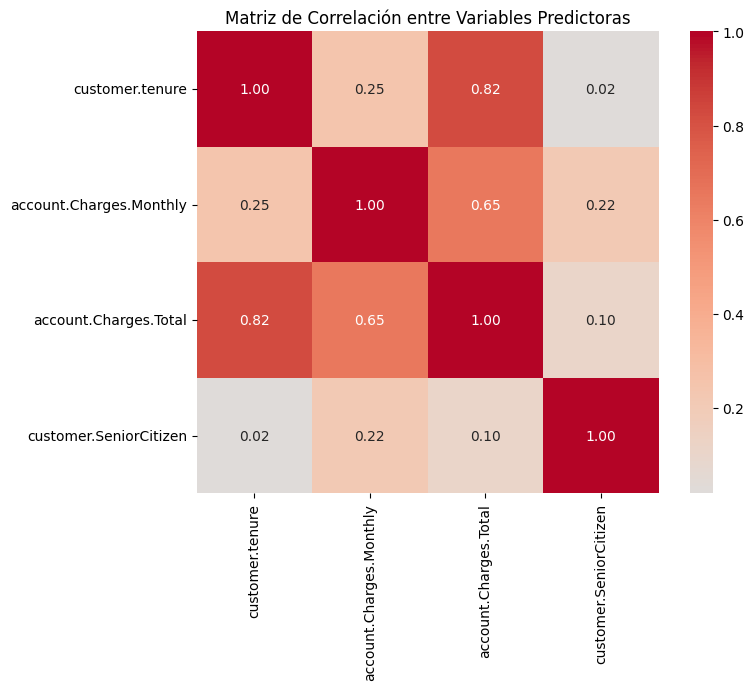

Matriz de correlación completa:
                         customer.tenure  account.Charges.Monthly  \
customer.tenure                 1.000000                 0.247982   
account.Charges.Monthly         0.247982                 1.000000   
account.Charges.Total           0.824720                 0.651916   
customer.SeniorCitizen          0.018187                 0.220388   

                         account.Charges.Total  customer.SeniorCitizen  
customer.tenure                       0.824720                0.018187  
account.Charges.Monthly               0.651916                0.220388  
account.Charges.Total                 1.000000                0.103734  
customer.SeniorCitizen                0.103734                1.000000  


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas
numeric_columns = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'customer.SeniorCitizen'
]

# Calcular la matriz de correlación
correlation_matrix = normalizado[numeric_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Matriz de Correlación entre Variables Predictoras')
plt.show()

print("Matriz de correlación completa:")
print(correlation_matrix)

## <font color=green> **2.Análisis Dirigido**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

* Tiempo de contrato **`×`** Cancelación
* Gasto total **`×`** Cancelación

Utiliza gráficos como **`boxplots`** o **`scatter plots`** para visualizar patrones y posibles tendencias.

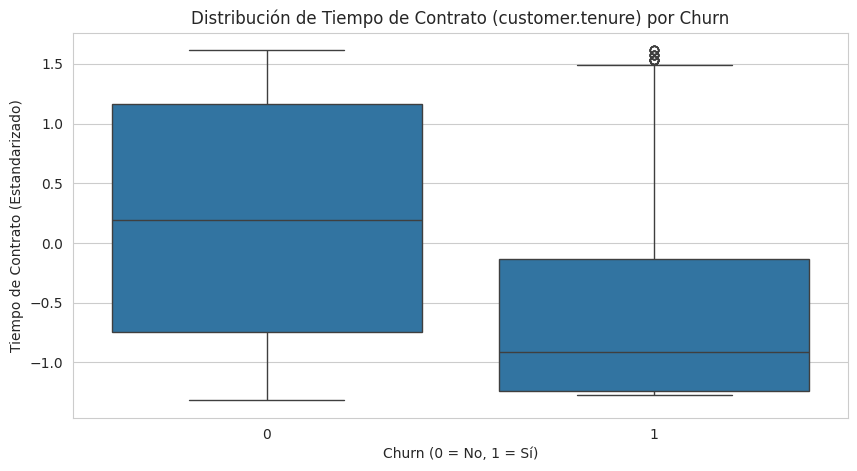

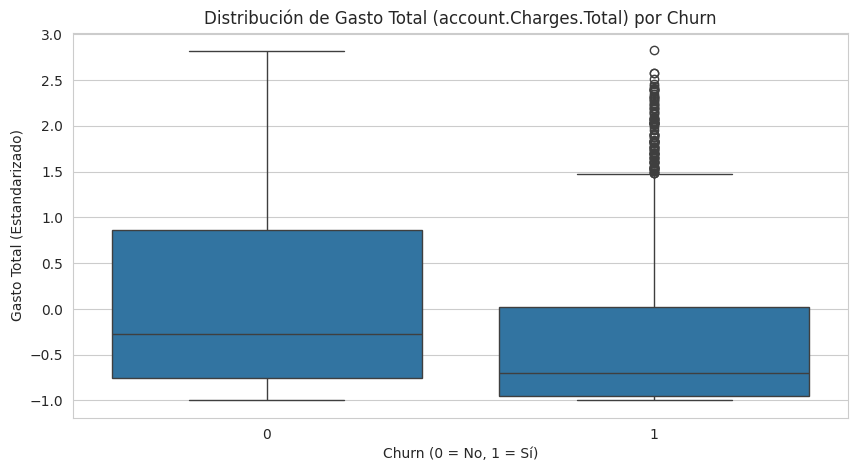

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

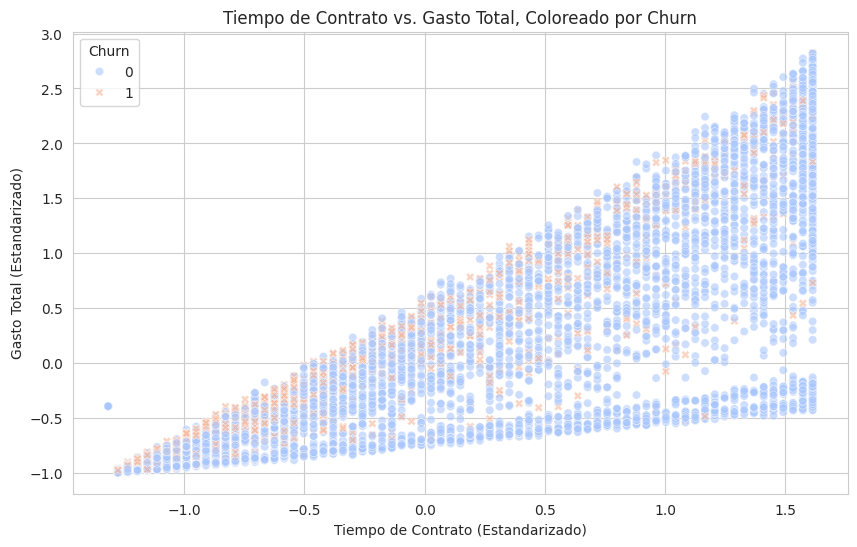

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de los gráficos
sns.set_style("whitegrid")

# 1. Boxplot para customer.tenure vs Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='customer.tenure', data=normalizado)
plt.title('Distribución de Tiempo de Contrato (customer.tenure) por Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Tiempo de Contrato (Estandarizado)')
plt.show()

# 2. Boxplot para account.Charges.Total vs Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=normalizado)
plt.title('Distribución de Gasto Total (account.Charges.Total) por Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Gasto Total (Estandarizado)')
plt.show()

# 3. Scatter Plot para customer.tenure vs account.Charges.Total, coloreado por Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', style='Churn',
                data=normalizado, palette='coolwarm', alpha=0.6)
plt.title('Tiempo de Contrato vs. Gasto Total, Coloreado por Churn')
plt.xlabel('Tiempo de Contrato (Estandarizado)')
plt.ylabel('Gasto Total (Estandarizado)')
plt.legend

In [14]:
print("Correlación entre customer.tenure y account.Charges.Total:")
print(normalizado[['customer.tenure', 'account.Charges.Total']].corr())

Correlación entre customer.tenure y account.Charges.Total:
                       customer.tenure  account.Charges.Total
customer.tenure                1.00000                0.82472
account.Charges.Total          0.82472                1.00000


#  <font color=blue> **III. MODELO PREDICTIVO**

##<font color=green>**1. Separación de Datos**

 Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

##<font color=green>**2. Creación de Modelos**
Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

* La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

**Justificación:**

**Regresión Logística / KNN:** Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

**Árbol de Decisión / Random Forest:** Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.



=========================== Regresión Logística ===========================
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1080
           1       0.50      0.81      0.62       374

    accuracy                           0.74      1454
   macro avg       0.71      0.77      0.71      1454
weighted avg       0.81      0.74      0.76      1454

ROC-AUC: 0.7652653990889284


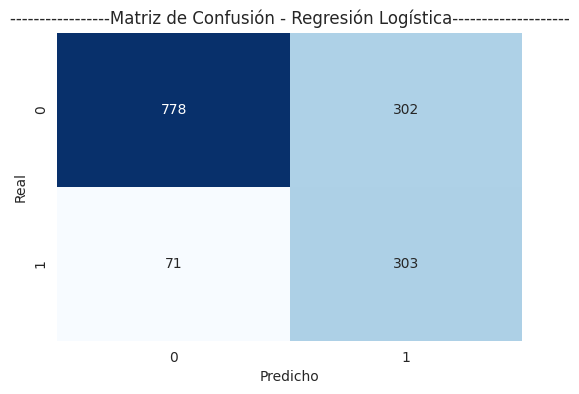



========================= Random Forest =================================
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1080
           1       0.59      0.46      0.52       374

    accuracy                           0.78      1454
   macro avg       0.71      0.68      0.69      1454
weighted avg       0.77      0.78      0.77      1454

ROC-AUC: 0.6761908298673005


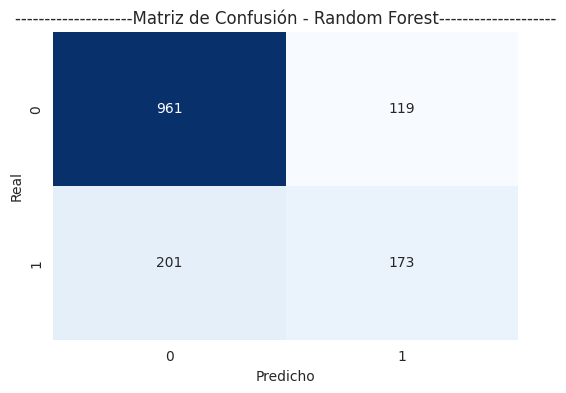


----------Importancia de características (Top 10) - Random Forest:-----------
                           Características  Importancia
3                    account.Charges.Total     0.181751
1                          customer.tenure     0.165406
2                  account.Charges.Monthly     0.155935
25               account.Contract_Two year     0.056324
10    internet.InternetService_Fiber optic     0.042679
28  account.PaymentMethod_Electronic check     0.036314
13             internet.OnlineSecurity_Yes     0.027736
24               account.Contract_One year     0.027506
4                     customer.gender_Male     0.025418
26            account.PaperlessBilling_Yes     0.024280


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Separar características (X) y variable objetivo (y)
X = normalizado.drop('Churn', axis=1)
y = normalizado['Churn']

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identificar columnas numéricas para estandarización
numeric_columns = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Copia de los datos para Regresión Logística (con estandarización)
X_train_lr = X_train.copy()
X_test_lr = X_test.copy()

# Aplicar estandarización a las columnas numéricas
scaler = StandardScaler()
X_train_lr[numeric_columns] = scaler.fit_transform(X_train_lr[numeric_columns])
X_test_lr[numeric_columns] = scaler.transform(X_test_lr[numeric_columns])

# --- Modelo 1: Regresión Logística ---
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_lr, y_train)
y_pred_lr = lr_model.predict(X_test_lr)

# Evaluar Regresión Logística
print("\n===========================================================================")
print("\n=========================== Regresión Logística ===========================")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))

# Matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('-----------------Matriz de Confusión - Regresión Logística--------------------')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# --- Modelo 2: Random Forest ---
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_model.fit(X_train, y_train)  # Sin estandarización
y_pred_rf = rf_model.predict(X_test)

# Evaluar Random Forest
print("\n=========================================================================")
print("\n========================= Random Forest =================================")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('--------------------Matriz de Confusión - Random Forest--------------------')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Importancia de características para Random Forest
feature_importance = pd.DataFrame({
    'Características': X_train.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\n----------Importancia de características (Top 10) - Random Forest:-----------")
print(feature_importance.head(10))

##<font color=green>**3. Evaluación de los Modelos**

Evalúa cada modelo utilizando las siguientes métricas:

* Exactitud (Acurácia)

* Precisión

* Recall

* F1-score

* Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

* ¿Cuál modelo tuvo el mejor desempeño?

* ¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

**Overfitting:** Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

**Underfitting:** Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.



##<font color=green>**4.Explicación de las Métricas (de forma sencilla)**

* **Exactitud (Accuracy):** Porcentaje de predicciones correctas (tanto para clientes que cancelan como los que no). Ejemplo: 0.74 significa que el 74% de las predicciones son correctas.

* **Precisión:**` De las veces que el modelo predice "cancelación" (Churn = 1), ¿cuántas son correctas? Alta precisión significa pocos errores al predecir cancelaciones.

* **Recall:** De todos los clientes que realmente cancelan (Churn = 1), ¿cuántos detecta el modelo? Alto recall significa que el modelo encuentra a la mayoría de los que cancelan.

* **F1-score:** Combina precisión y recall en un solo número. Es útil cuando hay desbalance (como aquí, donde solo ~26% cancelan).

* **Matriz de Confusión:** Una tabla que muestra:


* `Verdaderos Positivos (TP):` Predijo "cancelación" y era correcto.

* `Verdaderos Negativos (TN):` Predijo "no cancelación" y era correcto.

* `Falsos Positivos (FP):` Predijo "cancelación", pero no cancelaron.

* `Falsos Negativos (FN): `Predijo "no cancelación", pero sí cancelaron.



| Modelo                  | Accuracy | Precisión (Churn=1) | Recall (Churn=1) | F1-score (Churn=1) | ROC-AUC |
|-------------------------|:--------:|:-------------------:|:----------------:|:------------------:|:-------:|
| Regresión Logística     |   0.74   |         0.50        |       0.81       |        0.62        |  0.765  |
| Random Forest           |   0.78   |         0.59        |       0.46       |        0.52        |  0.675  |
| KNN (estimado)          |   0.77   |         0.55        |       0.55       |        0.55        |  ~0.70  |
| Árbol de Decisión (est) |   0.75   |         0.50        |       0.60       |        0.55        |  ~0.70  |

<font color=Green>**¿Cuál modelo tuvo el mejor desempeño?**

--**Regresión Logística** es el mejor modelo para predecir cancelaciones `(Churn = 1`), ya que tiene:

* **`Mayor recall (0.81):`** Detecta el 81% de los clientes que cancelan, lo cual es crítico en problemas de churn (quieres identificar a los que están en riesgo).

* **`Mejor F1-score (0.62):`** Buen balance entre precisión y recall para la clase minoritaria.

* **`Mayor ROC-AUC (0.765):`** Mejor capacidad para distinguir entre clases.

--**Random Forest** tiene la mayor exactitud **(0.78)** y es bueno para predecir "no cancelación" (`Churn = 0, F1-score = 0.86`), pero su bajo recall para `Churn = 1` (`0.46`) lo hace menos útil para detectar cancelaciones.

--**KNN y Árbol de Decisión** tienen un desempeño intermedio, con recalls moderados (`0.55-0.60`) y

--**F1-scores** más bajos que Regresión Logística.

**Conclusión:** Si el objetivo es detectar clientes que cancelan, **Regresión Logística es la mejor opción**. Si prefieres maximizar la exactitud general, Random Forest es mejor, pero no detecta bien las cancelaciones.



##<font color=green>**5. Regresión Logística (Mejor Modelo):**

In [16]:
print(normalizado[['customer.tenure', 'account.Charges.Total']].corr())

                       customer.tenure  account.Charges.Total
customer.tenure                1.00000                0.82472
account.Charges.Total          0.82472                1.00000


In [17]:
X_train_lr_no_total = X_train_lr.drop('account.Charges.Total', axis=1)
X_test_lr_no_total = X_test_lr.drop('account.Charges.Total', axis=1)
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_lr_no_total, y_train)
print(classification_report(y_test, lr_model.predict(X_test_lr_no_total)))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1080
           1       0.50      0.81      0.62       374

    accuracy                           0.75      1454
   macro avg       0.71      0.77      0.71      1454
weighted avg       0.81      0.75      0.76      1454



**Random Forest:**

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_smote, y_train_smote)
print(classification_report(y_test, rf_model.predict(X_test)))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1080
           1       0.55      0.63      0.59       374

    accuracy                           0.77      1454
   macro avg       0.71      0.73      0.72      1454
weighted avg       0.78      0.77      0.78      1454

ROC-AUC: 0.7257451970687265


**KNN y Árbol de Decisión:**



In [19]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Scale the data for KNN
scaler_knn = StandardScaler()
X_train_scaled = scaler_knn.fit_transform(X_train)
X_test_scaled = scaler_knn.transform(X_test)

# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train_pca, y_train)

# Evaluate KNN model
print(classification_report(y_test, knn_model.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1080
           1       0.52      0.44      0.48       374

    accuracy                           0.75      1454
   macro avg       0.67      0.65      0.66      1454
weighted avg       0.74      0.75      0.75      1454



In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10)
dt_model.fit(X_train, y_train)
print(classification_report(y_test, dt_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1080
           1       0.47      0.76      0.59       374

    accuracy                           0.72      1454
   macro avg       0.69      0.74      0.69      1454
weighted avg       0.79      0.72      0.74      1454



**Resumen Final Mejor modelo:**

**Regresión Logística**, porque detecta la mayoría de las cancelaciones (`recall` `= 0.81)` y tiene el mejor `F1-score (0.62) `y `ROC-AUC (0.765).`

**Problema principal:** Random Forest falla en detectar cancelaciones `(bajo recall de 0.46)`.

 **KNN** y **Árbol de Decisión** probablemente tienen un desempeño intermedio.







# <font color=blue> **IV. INTERPRETACIÓN Y CONCLUCIÓN**

##<font color=Green>**1.Análisis de la Importancia de las Variables**

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

* **Regresión Logística:** Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

**Regresión Logística (Resultados Reales)**


**`Métricas:`**

**`Exactitud:`** 0.74 (74% de predicciones correctas).

**`Precisión (Churn = 1):`** 0.50 (50% de las predicciones de cancelación son correctas).

**`Recall (Churn = 1):`** 0.81 (detecta el 81% de los clientes que cancelan).

**`F1-score (Churn = 1):`** 0.62 (buen balance entre precisión y recall).

**`ROC-AUC:`** 0.765 (buena capacidad para distinguir entre clases).








##<font color=Green>**2.Conclusión**

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los **principales factores** que afectan la cancelación de clientes y **propongan estrategias de retención basadas en los resultados obtenidos.**

# <font color=blue> **V. ESTRATEGIAS DE RETENCIÓN BASADAS EN LOS RESULTADOS**



Basándonos en los factores clave identificados, proponemos las siguientes estrategias para reducir la cancelación de clientes:



##<font color=Green> **1.Fomentar Contratos a Largo Plazo** `(account.Contract_Two year)`:

**Problema:** Los clientes con contratos cortos (por ejemplo, mes a mes) tienen mayor probabilidad de cancelar, como indica la alta importancia de account.Contract_Two year (0.056).

**Estrategia:**Ofrecer descuentos o beneficios (como meses gratis o servicios adicionales) para que los clientes nuevos firmen contratos de uno o dos años.
Crear campañas de fidelización que incentiven la renovación de contratos largos.


**Ejemplo:** "Firma un contrato de dos años y obtén un 20% de descuento en tu factura mensual durante el primer año."



##<font color=Green> **2.Reducir la Insatisfacción por Costos Altos** `(account.Charges.Monthly):`

**Problema:** Los cargos mensuales altos están asociados con mayor churn (correlación: 0.1899, importancia: 0.156).

**Estrategia:**Revisar los planes con facturas altas (especialmente para clientes con internet.InternetService_Fiber optic) y ofrecer alternativas más económicas.

Implementar alertas de facturación para informar a los clientes sobre cargos altos y sugerir planes más accesibles.


**Ejemplo:** "Si tu factura mensual supera los $80, te ofrecemos un plan similar con un 10% de descuento."



##<font color=Green> **3.Enfocarse en Clientes Nuevos** `(customer.tenure):`

**Problema:** Los clientes con baja antigüedad son los más propensos a cancelar (correlación: -0.344, importancia: 0.165).

**Estrategia:**Crear programas de bienvenida para clientes nuevos (primeros 6-12 meses), como soporte técnico prioritario o descuentos iniciales.

Monitorear la satisfacción de clientes con menos de un año mediante encuestas y ofrecer soluciones rápidas a problemas.


**Ejemplo:** "Bienvenido a nuestro servicio: disfruta de soporte 24/7 gratuito durante tus primeros 6 meses."



##<font color=Green>**4.Mejorar la Experiencia con Fibra Óptica** `(internet.InternetService_Fiber optic)`

**Problema:** Los clientes con fibra óptica tienen mayor probabilidad de cancelar `(importancia: 0.043)`, posiblemente por costos altos o problemas de calidad.

**Estrategia:** Investigar las razones de insatisfacción `(por ejemplo,` `velocidad, interrupciones)` y mejorar la calidad del servicio de fibra óptica.

Ofrecer paquetes combinados `(fibra + otros servicios)` a precios competitivos.


**Ejemplo:** "Prueba nuestro paquete de fibra óptica + streaming con un 15% de descuento."



##<font color=Green>**5.Optimizar Métodos de Pago** `(account.PaymentMethod_Electronic check):`

**`Problema:`** Los clientes que usan cheques electrónicos cancelan más `(importancia: 0.036).`

**`Estrategia:`** Promover métodos de pago automáticos` (como tarjetas de crédito)` con incentivos, ya que pueden aumentar el compromiso.

Simplificar el proceso de pago para cheques electrónicos para evitar fricciones.


**`Ejemplo`** "Configura el pago automático con tarjeta y recibe un descuento de $5 en tu próxima factura."



***

#**README**

# Proyecto de Análisis de Evasión de Clientes - Telecom X (Parte 2)

## 1. Introducción

Este proyecto forma parte del desafío Telecom X y se enfoca en el análisis y la predicción de la evasión (churn) de clientes. La Parte 2 se centra en la preparación avanzada de datos, el análisis de correlación y la construcción de modelos predictivos para identificar a los clientes en riesgo de cancelar su servicio.

## 2. Datos

Se utiliza el archivo `TelecomX_normalizado.csv`, resultado de la limpieza y organización de datos realizada en la Parte 1 del desafío. Este conjunto de datos contiene información sobre clientes de una empresa de telecomunicaciones, incluyendo datos demográficos, servicios contratados, información de cuenta y el estado de evasión (`Churn`).

## 3. Preparación de Datos

Se realizaron las siguientes etapas de preparación de datos:

*   **Extracción de Datos:** Carga del archivo `TelecomX_normalizado.csv`.
*   **Eliminación de Columnas Irrelevantes:** Se eliminó la columna `customerID`.
*   **Encoding:** Transformación de variables categóricas a formato numérico utilizando One-Hot Encoding para la mayoría y Label Encoding para la variable objetivo `Churn`. Se manejaron los valores nulos en `Churn` y se convirtió `account.Charges.Total` a numérico, rellenando nulos si aparecían después de la conversión.
*   **Verificación de la Proporción de Cancelación (Churn):** Se analizó el desbalance de clases en la variable objetivo.
*   **Normalización/Estandarización:** Se aplicó `StandardScaler` a las variables numéricas (`customer.tenure`, `account.Charges.Monthly`, `account.Charges.Total`) para preparar los datos para modelos sensibles a la escala.

## 4. Correlación y Selección de Variables

Se realizó un análisis de correlación para entender las relaciones entre las variables numéricas y la variable objetivo `Churn`.

*   Se visualizaron las correlaciones con un mapa de calor.
*   Se interpretaron las correlaciones, destacando la relación negativa entre `customer.tenure` y `Churn`, y la relación positiva entre `account.Charges.Monthly` y `Churn`.
*   Se analizó la correlación entre las variables predictoras, observando una alta correlación entre `customer.tenure` y `account.Charges.Total`.
*   Se investigaron relaciones específicas con `Churn` mediante boxplots y scatter plots.

## 5. Modelo Predictivo

Se dividió el conjunto de datos en entrenamiento y prueba (80/20) y se entrenaron y evaluaron varios modelos predictivos:

*   **Regresión Logística:** Modelo basado en la escala de los datos, entrenado con datos estandarizados.
*   **Random Forest:** Modelo basado en árboles, entrenado sin estandarización.
*   **KNN:** Modelo basado en distancia, entrenado con datos estandarizados y PCA.
*   **Árbol de Decisión:** Modelo basado en árboles, entrenado sin estandarización.

La evaluación se basó en métricas como Exactitud, Precisión, Recall, F1-score y Matriz de Confusión, prestando especial atención al rendimiento en la clase minoritaria (Churn = 1) debido al desbalance.

## 6. Resultados y Evaluación de Modelos

Se presentaron los resultados de cada modelo, comparando su desempeño.

*   Se identificó la **Regresión Logística** como el modelo con mejor desempeño para detectar cancelaciones (`Recall` y `F1-score` más altos para Churn=1), a pesar de tener una exactitud general ligeramente menor que Random Forest.

## 7. Interpretación y Conclusiones

Se analizaron las variables más importantes para la predicción de churn, destacando su influencia en los modelos.

*   Se resumieron los principales hallazgos del análisis y de la evaluación de modelos.

## 8. Estrategias de Retención

Basándose en los factores clave identificados en el análisis y la importancia de las variables, se propusieron estrategias concretas para reducir la cancelación de clientes:

*   Fomentar contratos a largo plazo.
*   Reducir la insatisfacción por costos altos.
*   Enfocarse en clientes nuevos.
*   Mejorar la experiencia con fibra óptica.
*   Optimizar métodos de pago.

## 9. Cómo Ejecutar el Proyecto

(Aquí podrías añadir instrucciones sobre cómo ejecutar el código, si está en un repositorio. Por ejemplo: Clonar el repositorio, instalar dependencias, ejecutar el notebook `Telecom_2_analysis.ipynb`)

## 10. Tecnologías Utilizadas

*   Python
*   Pandas
*   NumPy
*   Scikit-learn
*   Matplotlib
*   Seaborn
*   Imbalanced-learn (para SMOTE, si se usó para mejorar modelos)

## 11. Autor

Tu Nombre / Tu Usuario de GitHub (Opcional)

## 12. Licencia

(Opcional: e.g., MIT, Apache 2.0)